In [1]:
#IMPORT LIBRARIES
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import data
df=pd.read_csv("datasets/cleandf.csv")

In [3]:
df.sample()

,Unnamed: 0,AIRLINENAME,CABINTYPE,DATEFLOWN,DATEPUB,ENTERTAINMENTRATING,FOODRATING,GROUNDSERVICERATING,ORIGINCOUNTRY,OVERALLSCORE,...,SLUG,TITLE,TRAVELLER,PURPOSE,TRIPVERIFIED,VALUERATING,WIFIRATING,UNIQUE_ID,LONGDISTANCE,YEAR
700,700,Air Arabia,1,2017-01-01,7th January 2017,0,0,1,SaudiArabia,1,...,air-arabia,last ever experience of Air Arabia,2,1,0,1,0,afcea7fc-f734-4ae2-a315-f42398a6fd46,0,2017


In [4]:
df=df.drop(columns="Unnamed: 0")

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
#take the airlines with most reviews

In [7]:
review_counts = df.groupby('AIRLINENAME').size().reset_index(name='REVIEW_COUNT')

# Filter airlines with at least 2,000 reviews
airlines_with_min_reviews = review_counts[review_counts['REVIEW_COUNT'] >= 2000]

In [8]:
review_counts

,AIRLINENAME,REVIEW_COUNT
0,AB Aviation,3
1,ANA All Nippon Airways,290
2,ASKY Airlines,17
3,ATA Airlines,2
4,Adria Airways,39
...,...,...
509,euroAtlantic Airways,15
510,fastjet,33
511,flyadeal,19
512,flybe,4


In [9]:
airlines_with_min_reviews #these will be the airlines for my main analysis!

,AIRLINENAME,REVIEW_COUNT
80,American Airlines,4912
126,British Airways,2723
164,Delta Air Lines,2338
200,Frontier Airlines,2700
410,Spirit Airlines,3972
468,United Airlines,3721


In [10]:
len(airlines_with_min_reviews)

6

In [11]:
dfeda= df.loc[df["AIRLINENAME"].isin(airlines_with_min_reviews["AIRLINENAME"])]

In [12]:
#save data from these 6 airlines only
saved=dfeda.to_excel("datasets/most_reviewed_airlines.xlsx")

In [13]:
dfeda.AIRLINENAME.nunique()

6

In [14]:
dfeda.columns

Index(['AIRLINENAME', 'CABINTYPE', 'DATEFLOWN', 'DATEPUB',
       'ENTERTAINMENTRATING', 'FOODRATING', 'GROUNDSERVICERATING',
       'ORIGINCOUNTRY', 'OVERALLSCORE', 'RECOMMENDED', 'REVIEW', 'ROUTE',
       'ORIGIN', 'DESTINY', 'SCALE_YN', 'SEATCOMFORTRATING', 'SERVICERATING',
       'SLUG', 'TITLE', 'TRAVELLER', 'PURPOSE', 'TRIPVERIFIED', 'VALUERATING',
       'WIFIRATING', 'UNIQUE_ID', 'LONGDISTANCE', 'YEAR'],
      dtype='object')

In [15]:
#GRAPH THE RATINGS OF THE MOST REVIEWED AIRLINES (2000+ REVIEWS)

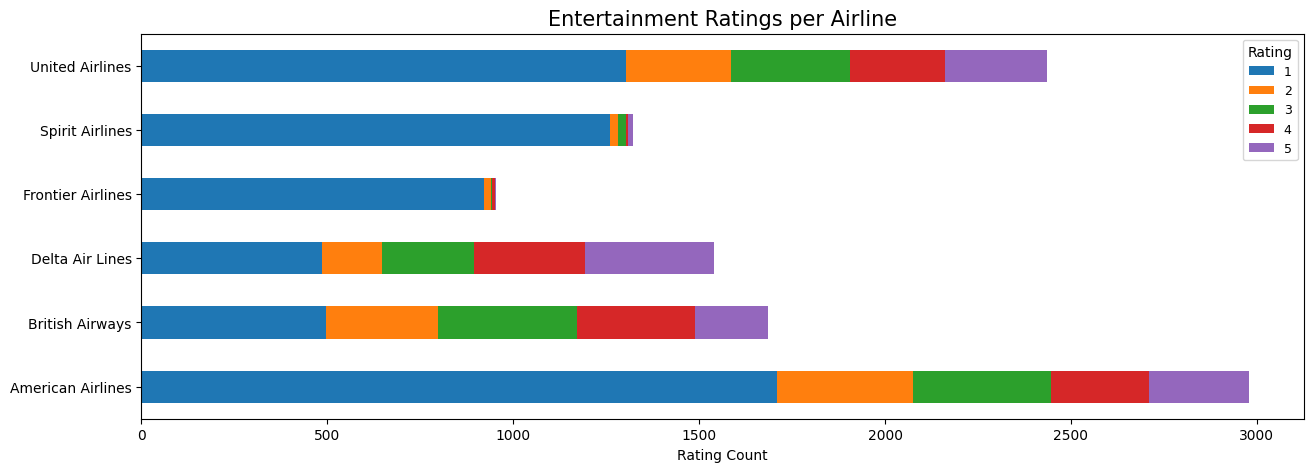

In [16]:
#entertainment rating. GRAPH ONLY FOR LONGDISTANCE FLIGHTS! If short distance, no entertainment available
long=dfeda[dfeda['ENTERTAINMENTRATING']>0] #we assume that only long distance flights have entertainment.
entert_ratings_count = long.groupby(['AIRLINENAME', 'ENTERTAINMENTRATING'])['ENTERTAINMENTRATING'].count().unstack()
entert_ratings_count.plot(kind='barh', stacked=True, figsize=(15, 5))
plt.xlabel('Rating Count')
plt.ylabel(None)
plt.title('Entertainment Ratings per Airline', fontsize=15)
plt.legend(title="Rating", fontsize=9)
plt.show()
    

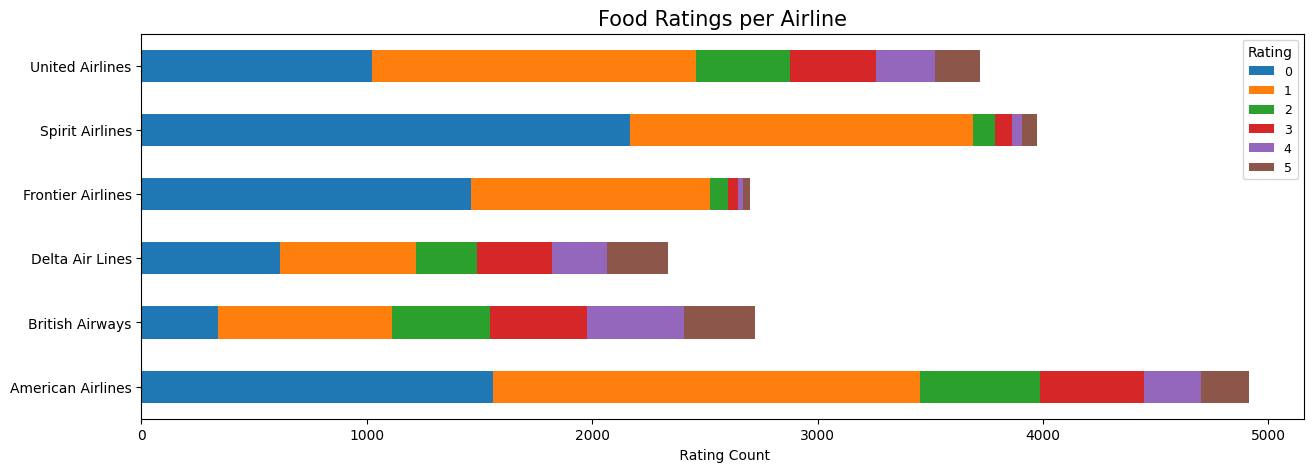

In [17]:
#foor rating
food_ratings_count = dfeda.groupby(['AIRLINENAME', 'FOODRATING'])['FOODRATING'].count().unstack()
food_ratings_count.plot(kind='barh', stacked=True, figsize=(15, 5))
plt.xlabel(' Rating Count')
plt.ylabel(None)
plt.title('Food Ratings per Airline', fontsize=15)
plt.legend(title="Rating", fontsize=9)
plt.show()

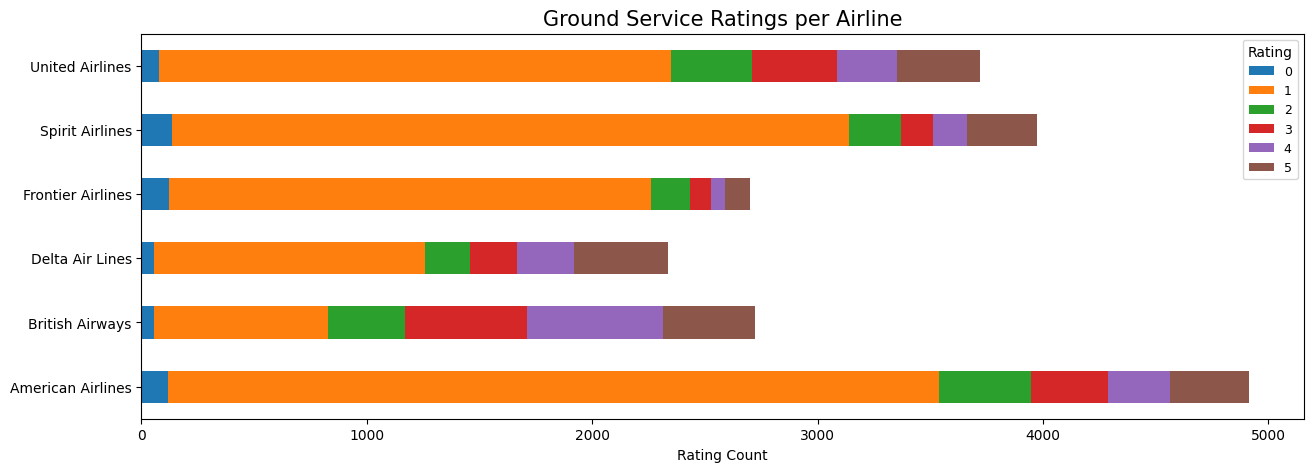

In [18]:
#ground staff service rating
ground_ratings_count = dfeda.groupby(['AIRLINENAME', 'GROUNDSERVICERATING'])['GROUNDSERVICERATING'].count().unstack()

# Plot the data
ground_ratings_count.plot(kind='barh', stacked=True, figsize=(15, 5))
plt.xlabel('Rating Count')
plt.ylabel(None)
plt.title('Ground Service Ratings per Airline', fontsize=15)
plt.legend(title="Rating", fontsize=9)
plt.show()

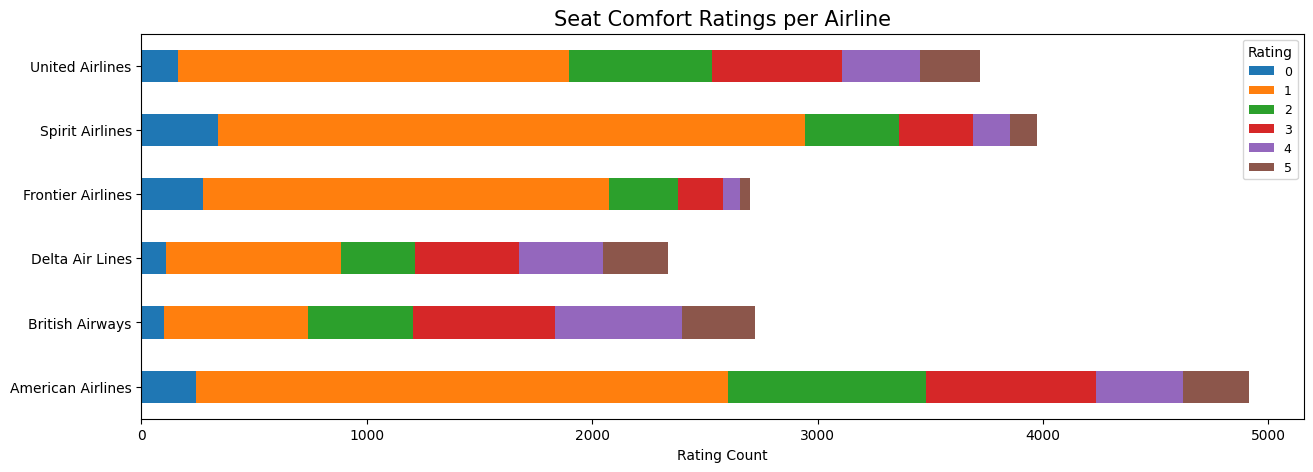

In [19]:
#seat comfort rating
seat_ratings_count = dfeda.groupby(['AIRLINENAME', 'SEATCOMFORTRATING'])['SEATCOMFORTRATING'].count().unstack()

# Plot the data
seat_ratings_count.plot(kind='barh', stacked=True, figsize=(15, 5))
plt.xlabel('Rating Count')
plt.ylabel(None)
plt.title('Seat Comfort Ratings per Airline', fontsize=15)
plt.legend(title="Rating", fontsize=9)
plt.show()

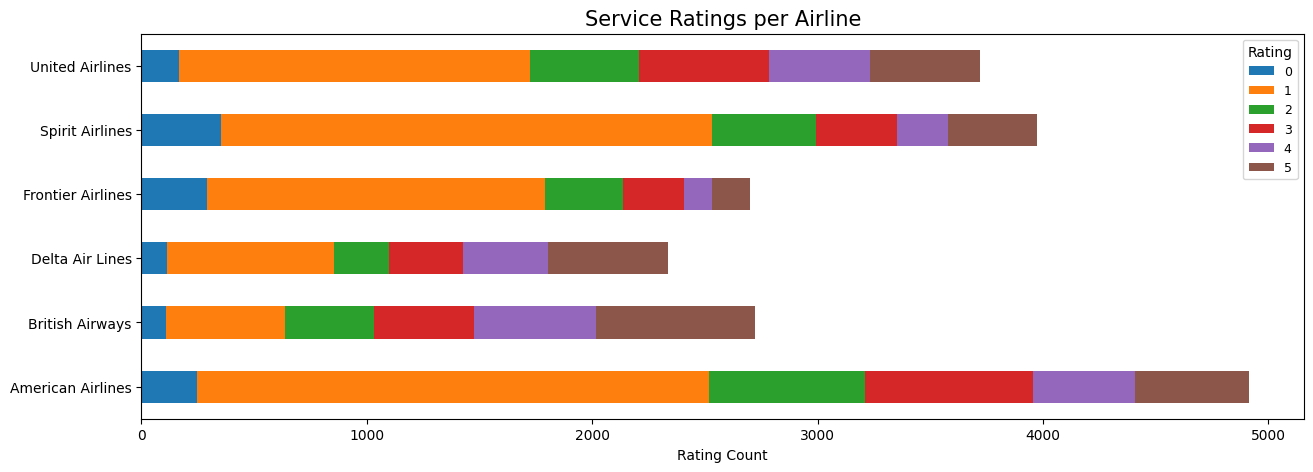

In [20]:
# Group by 'AIRLINENAME' and 'SERVICERATING', then count the occurrences of each service rating per airline
service_ratings_count = dfeda.groupby(['AIRLINENAME', 'SERVICERATING'])['SERVICERATING'].count().unstack()

# Plot the data
service_ratings_count.plot(kind='barh', stacked=True, figsize=(15, 5))

# Show the plot
plt.xlabel('Rating Count')
plt.ylabel(None)
plt.title('Service Ratings per Airline', fontsize=15)
plt.legend(title="Rating", fontsize=9)
plt.show()

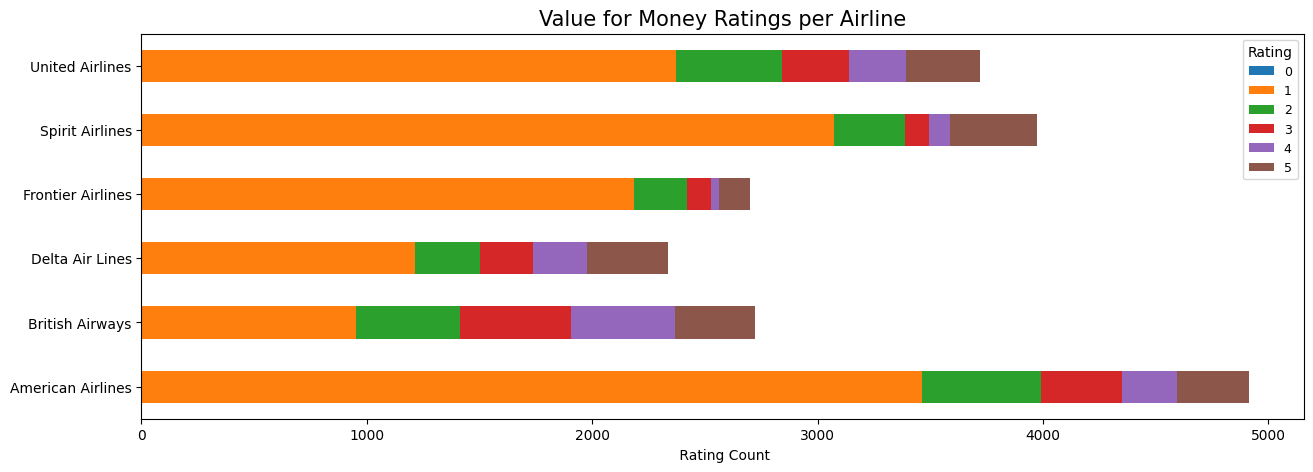

In [21]:
value_ratings_count = dfeda.groupby(['AIRLINENAME', 'VALUERATING'])['VALUERATING'].count().unstack()

# Plot the data
value_ratings_count.plot(kind='barh', stacked=True, figsize=(15, 5))
plt.xlabel(' Rating Count')
plt.ylabel(None)
plt.title('Value for Money Ratings per Airline', fontsize=15)
plt.legend(title="Rating", fontsize=9)
plt.show()

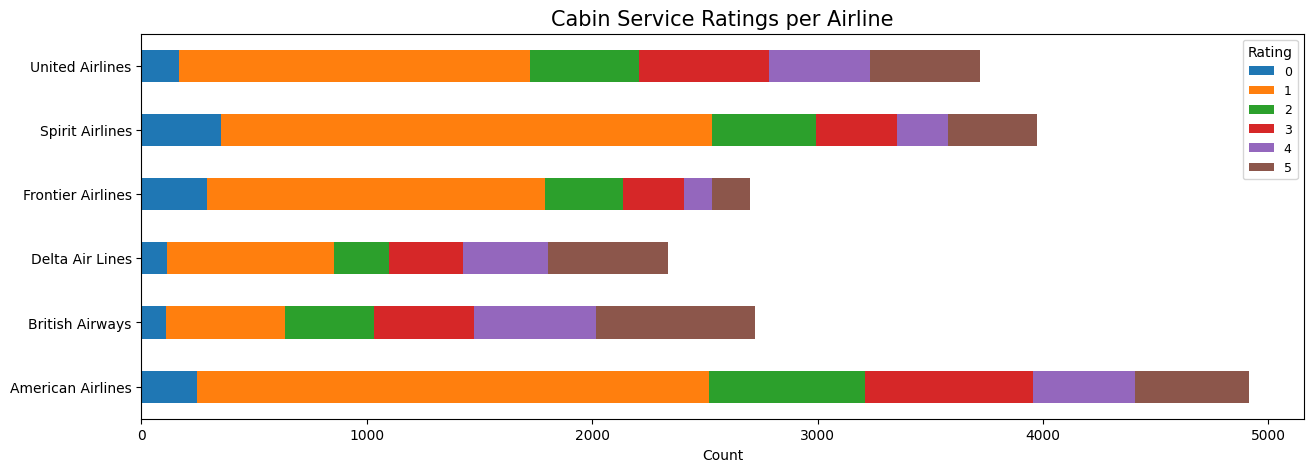

In [22]:
service_ratings_count = dfeda.groupby(['AIRLINENAME', 'SERVICERATING'])['SERVICERATING'].count().unstack()
service_ratings_count.plot(kind='barh', stacked=True, figsize=(15, 5))
plt.xlabel('Count')
plt.ylabel(None)
plt.title('Cabin Service Ratings per Airline', fontsize=15)
plt.legend(title="Rating", fontsize=9)
plt.show()


In [23]:
dfeda.sample()

,AIRLINENAME,CABINTYPE,DATEFLOWN,DATEPUB,ENTERTAINMENTRATING,FOODRATING,GROUNDSERVICERATING,ORIGINCOUNTRY,OVERALLSCORE,RECOMMENDED,REVIEW,ROUTE,ORIGIN,DESTINY,SCALE_YN,SEATCOMFORTRATING,SERVICERATING,SLUG,TITLE,TRAVELLER,PURPOSE,TRIPVERIFIED,VALUERATING,WIFIRATING,UNIQUE_ID,LONGDISTANCE,YEAR
38915,Frontier Airlines,1,2022-03-01,8th March 2022,0,0,0,UnitedStates,1,0,We had a family member take a turn for the wor...,Orlando to Baltimore Washington,Orlando,Baltimore Washington,0,0,0,frontier-airlines,fee for cancelling is ridiculous!,3,1,0,1,0,702e6666-bd1f-4c69-b93a-9a17ab466ddf,0,2022


In [24]:
#By Specific Country (Spain and USA as proxys from Barcelona and New York):

spain_filter = (dfeda['ORIGIN'].isin(['Barcelona', 'Barcelona, Spain', 'BCN']))

In [25]:
eeuu_filter = (dfeda['DESTINY'].isin(['New York', 'NY', 'JFK, New York', 'JFK', 'New-york']))

In [26]:
spain = dfeda[spain_filter]
eeuu = dfeda[eeuu_filter]

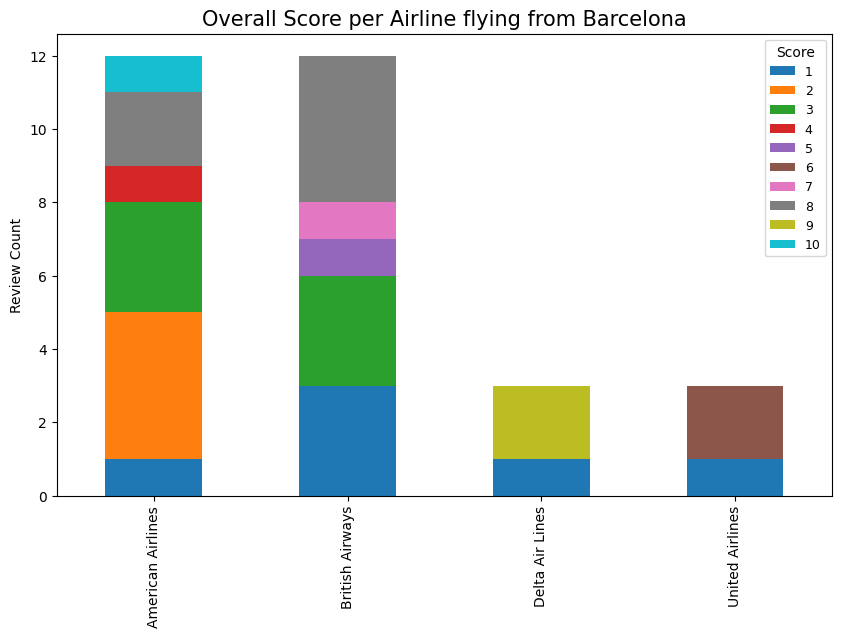

In [27]:
# Group by 'AIRLINENAME' and 'SERVICERATING', then count the occurrences of each service rating per airline. Spain 
service_ratings_count = spain.groupby(['AIRLINENAME', 'OVERALLSCORE'])['OVERALLSCORE'].count().unstack()

# Graph the data
service_ratings_count.plot(kind='bar', stacked=True, figsize=(10, 6))


plt.xlabel(None)
plt.ylabel('Review Count', fontsize=10)
plt.title('Overall Score per Airline flying from Barcelona', fontsize=15)
plt.legend(title="Score", fontsize=9)
plt.show()

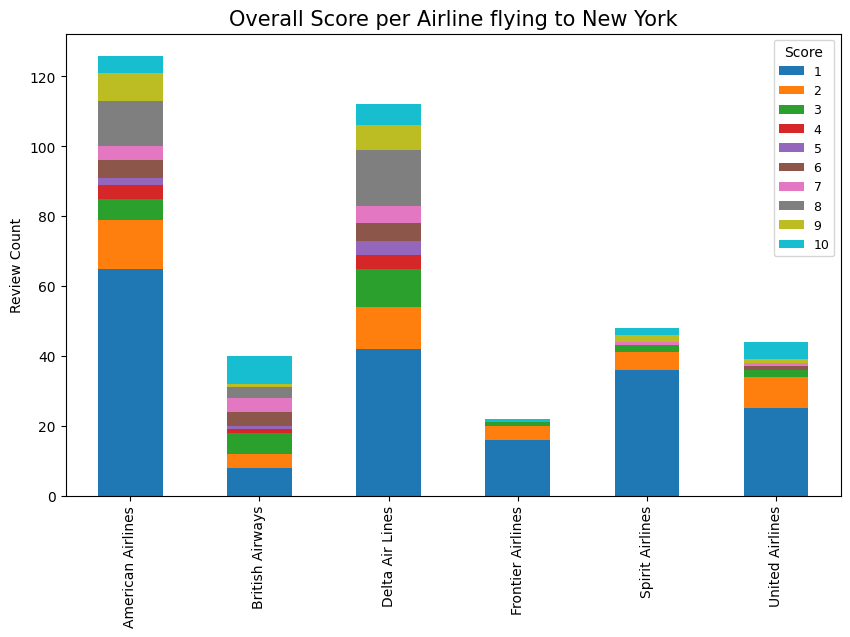

In [28]:
# Group by 'AIRLINENAME' and 'SERVICERATING', then count the occurrences of each service rating per airline. New York 
service_ratings_count = eeuu.groupby(['AIRLINENAME', 'OVERALLSCORE'])['OVERALLSCORE'].count().unstack()

# Plot the data
service_ratings_count.plot(kind='bar', stacked=True, figsize=(10, 6))

# Show the plot
plt.xlabel(None)
plt.ylabel('Review Count', fontsize=10)
plt.title('Overall Score per Airline flying to New York', fontsize=15)
plt.legend(title="Score", fontsize=9)
plt.show()

In [29]:
#Transform the data to Leisure/Business so that we can interpret better the graphs
dfeda.PURPOSE=np.where(dfeda.PURPOSE==1, 'Leisure', 'Business')

In [30]:
#Transform the data to Type of Traveller so that we can interpret better the graphs
dfeda['TRAVELLER'] = np.where(dfeda['TRAVELLER'] == 1, "Solo", 
                              np.where(dfeda['TRAVELLER'] == 2, "Couple", 
                                       np.where(dfeda['TRAVELLER'] == 3, "Family", dfeda['TRAVELLER'])))

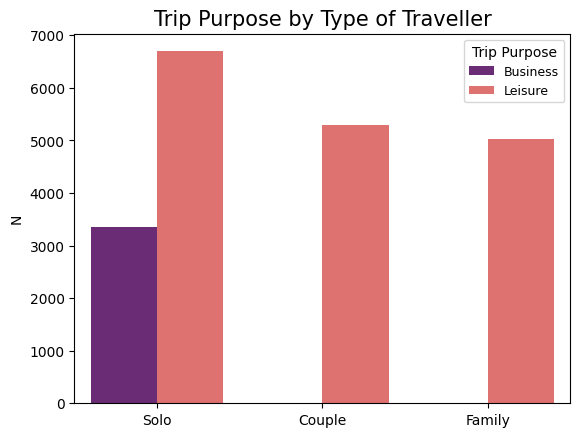

In [31]:
#Plot type of traveller graph
purpose=sns.countplot(hue="PURPOSE", data = dfeda, x="TRAVELLER", palette="magma");
plt.xlabel(None);
plt.ylabel("N");
plt.title("Trip Purpose by Type of Traveller", fontsize=15)
plt.legend(title='Trip Purpose', fontsize=9)

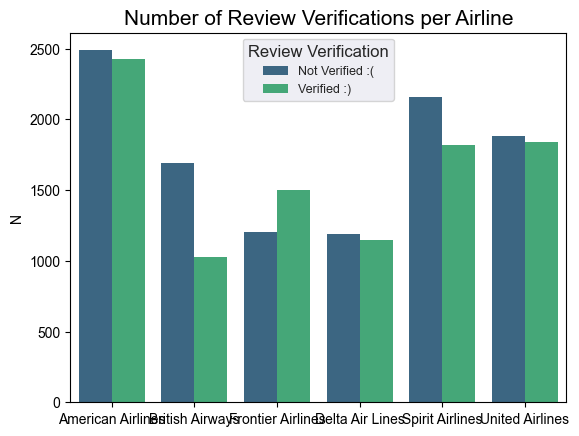

In [32]:
#Number of verified Reviews by Airline
purpose=sns.countplot(hue="TRIPVERIFIED", data = dfeda, x="AIRLINENAME", palette="viridis");
sns.set(rc={"figure.figsize":(15, 6)}) 
plt.xlabel(None);
plt.ylabel("N");
plt.title("Number of Review Verifications per Airline", fontsize=15)
plt.legend(labels = ['Not Verified :(', 'Verified :)'], title='Review Verification', fontsize=9)

In [33]:
#Rename variable 'recommended' to better interpret it
dfeda.RECOMMENDED=np.where(dfeda.RECOMMENDED==1, 'Yes', 'No')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


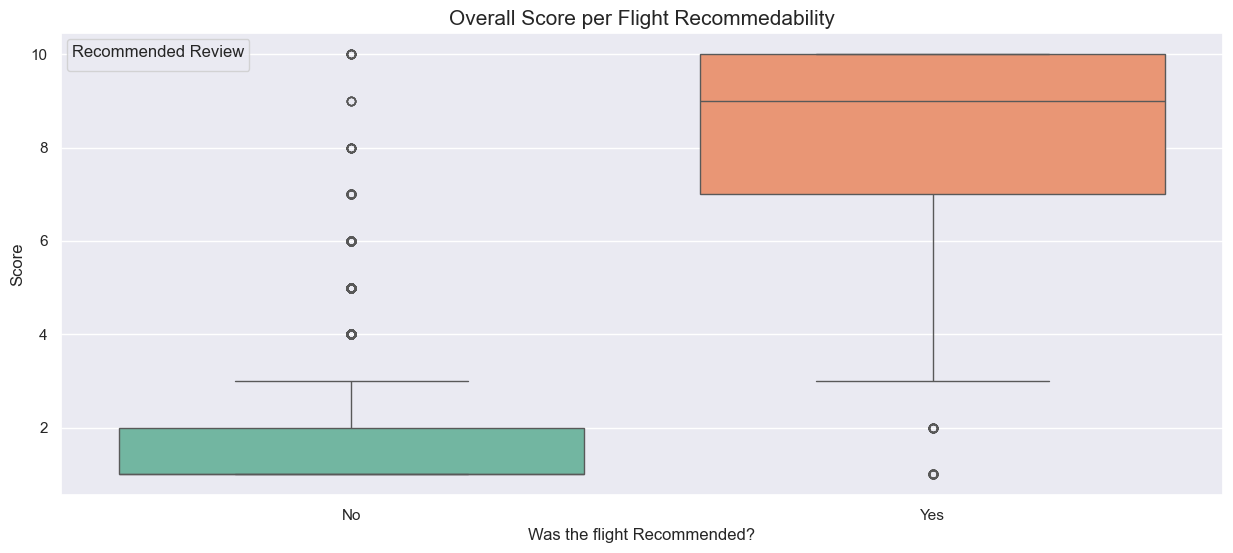

In [34]:
sns.boxplot(data=dfeda, x='RECOMMENDED', y='OVERALLSCORE', palette='Set2')
plt.xlabel('Was the flight Recommended?');
plt.ylabel("Score");
plt.title('Overall Score per Flight Recommedability', fontsize=15)
plt.legend(title='Recommended Review', fontsize=9)
plt.show()

In [35]:
eeuu.sample()

,AIRLINENAME,CABINTYPE,DATEFLOWN,DATEPUB,ENTERTAINMENTRATING,FOODRATING,GROUNDSERVICERATING,ORIGINCOUNTRY,OVERALLSCORE,RECOMMENDED,REVIEW,ROUTE,ORIGIN,DESTINY,SCALE_YN,SEATCOMFORTRATING,SERVICERATING,SLUG,TITLE,TRAVELLER,PURPOSE,TRIPVERIFIED,VALUERATING,WIFIRATING,UNIQUE_ID,LONGDISTANCE,YEAR
86758,United Airlines,1,2018-07-01,6th July 2018,0,2,1,UnitedStates,1,0,Palm Springs to New York via San Francisco. Yo...,Palm Springs to New York via San Francisco,Palm Springs,New York,1,2,3,united-airlines,they just want money,1,1,1,1,0,745b4c4a-2d3f-4020-a972-14547ce725fb,0,2018


In [36]:
#honeymoon is the df that includes data only from origin BCN and Destiny New York
honeymoon = dfeda[spain_filter & eeuu_filter]

In [37]:
len(honeymoon)

6

In [38]:
honeymoon

,AIRLINENAME,CABINTYPE,DATEFLOWN,DATEPUB,ENTERTAINMENTRATING,FOODRATING,GROUNDSERVICERATING,ORIGINCOUNTRY,OVERALLSCORE,RECOMMENDED,REVIEW,ROUTE,ORIGIN,DESTINY,SCALE_YN,SEATCOMFORTRATING,SERVICERATING,SLUG,TITLE,TRAVELLER,PURPOSE,TRIPVERIFIED,VALUERATING,WIFIRATING,UNIQUE_ID,LONGDISTANCE,YEAR
13972,American Airlines,1,2022-05-01,22nd May 2022,2,1,2,UnitedStates,2,No,"The first leg of our returning from Barcelona,...","Barcelona, Spain to JFK, New York via LAX, Cal...","Barcelona, Spain","JFK, New York",1,1,3,american-airlines,our trip with AA was a mixed experience,Couple,Leisure,1,1,0,3abe3748-d747-4421-8f95-e3a5ce231ce2,1,2022
17379,American Airlines,1,2017-05-01,21st May 2017,4,2,1,UnitedStates,3,No,Barcelona to New York. Truly disappointed. We ...,Barcelona to New York,Barcelona,New York,0,2,1,american-airlines,lady who literally yelled at me,Family,Leisure,0,3,0,f1bfc8e6-cbed-42e4-b4b7-0e808c10ca53,1,2017
17545,American Airlines,2,2016-12-01,10th December 2016,4,2,1,UnitedKingdom,2,No,Barcelona to New York JFK with American Airlin...,BCN to JFK,BCN,JFK,0,3,1,american-airlines,a massive disappointment,Couple,Leisure,0,1,4,43a122fc-e351-4332-8fd6-e35921cf6610,1,2016
21890,British Airways,1,2018-11-01,19th January 2019,2,1,1,UnitedStates,1,No,Barcelona to New York via London. I was in Bar...,Barcelona to New York via London,Barcelona,New York,1,2,2,british-airways,offered me no compensation,Solo,Leisure,1,1,0,4e830d22-e17f-48da-b8e2-093022f5e2ab,1,2018
47056,Delta Air Lines,1,2017-07-01,19th July 2017,2,2,1,UnitedStates,1,No,Barcelona to New York JFK on 15th July. The fl...,Barcelona to New York,Barcelona,New York,0,1,1,delta-air-lines,Customer service is just horrible,Family,Leisure,0,1,0,8c7bb362-9c4f-45c0-87bc-d910a673d31a,1,2017
47615,Delta Air Lines,1,2015-04-01,14th June 2015,5,3,4,France,9,Yes,Check in procedure was ok but slow. The flight...,Barcelona to New-york,Barcelona,New-york,0,4,5,delta-air-lines,Delta Air Lines customer review,Family,Leisure,0,4,1,3d29e340-ec85-4ae0-95ea-06501dcbed35,1,2015


In [39]:
ratings=honeymoon[['AIRLINENAME', 'ENTERTAINMENTRATING', 'FOODRATING', 'GROUNDSERVICERATING','OVERALLSCORE','SEATCOMFORTRATING', 'SERVICERATING','VALUERATING']]

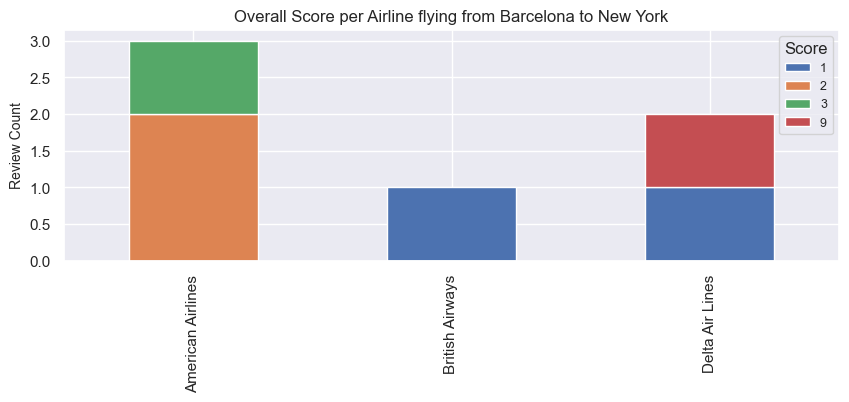

In [40]:
service_ratings_count = honeymoon.groupby(['AIRLINENAME', 'OVERALLSCORE'])['OVERALLSCORE'].count().unstack()

# Plot the data
service_ratings_count.plot(kind='bar', stacked=True, figsize=(10, 3))

# Show the plot
plt.xlabel(None)
plt.ylabel('Review Count', fontsize=10)
plt.title('Overall Score per Airline flying from Barcelona to New York', fontsize=12)
plt.legend(title="Score", fontsize=9)
plt.show()

#important, we have only one review per airline, one value, so ok to understand

In [41]:
grouped_hm=ratings.groupby(['AIRLINENAME', 'ENTERTAINMENTRATING', 'FOODRATING', 'GROUNDSERVICERATING','OVERALLSCORE','SEATCOMFORTRATING', 'SERVICERATING','VALUERATING'], as_index=False).mean("OVERALLSCORE")
grouped_hm.round(2)

,AIRLINENAME,ENTERTAINMENTRATING,FOODRATING,GROUNDSERVICERATING,OVERALLSCORE,SEATCOMFORTRATING,SERVICERATING,VALUERATING
0,American Airlines,2,1,2,2,1,3,1
1,American Airlines,4,2,1,2,3,1,1
2,American Airlines,4,2,1,3,2,1,3
3,British Airways,2,1,1,1,2,2,1
4,Delta Air Lines,2,2,1,1,1,1,1
5,Delta Air Lines,5,3,4,9,4,5,4


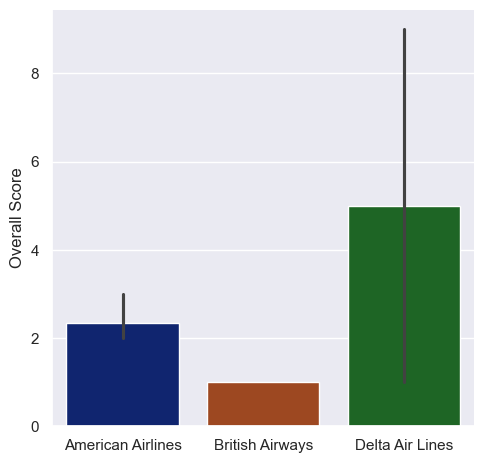

In [42]:
honey_score=sns.catplot(kind='bar', data=grouped_hm, x='AIRLINENAME', y='OVERALLSCORE', palette="dark")
plt.xlabel(None);
plt.ylabel("Overall Score");
honey_score.set_titles("Overall Score")

In [43]:
ratings

,AIRLINENAME,ENTERTAINMENTRATING,FOODRATING,GROUNDSERVICERATING,OVERALLSCORE,SEATCOMFORTRATING,SERVICERATING,VALUERATING
13972,American Airlines,2,1,2,2,1,3,1
17379,American Airlines,4,2,1,3,2,1,3
17545,American Airlines,4,2,1,2,3,1,1
21890,British Airways,2,1,1,1,2,2,1
47056,Delta Air Lines,2,2,1,1,1,1,1
47615,Delta Air Lines,5,3,4,9,4,5,4


In [44]:
grouped_hm

,AIRLINENAME,ENTERTAINMENTRATING,FOODRATING,GROUNDSERVICERATING,OVERALLSCORE,SEATCOMFORTRATING,SERVICERATING,VALUERATING
0,American Airlines,2,1,2,2,1,3,1
1,American Airlines,4,2,1,2,3,1,1
2,American Airlines,4,2,1,3,2,1,3
3,British Airways,2,1,1,1,2,2,1
4,Delta Air Lines,2,2,1,1,1,1,1
5,Delta Air Lines,5,3,4,9,4,5,4


[Text(0, 0.5, '')]

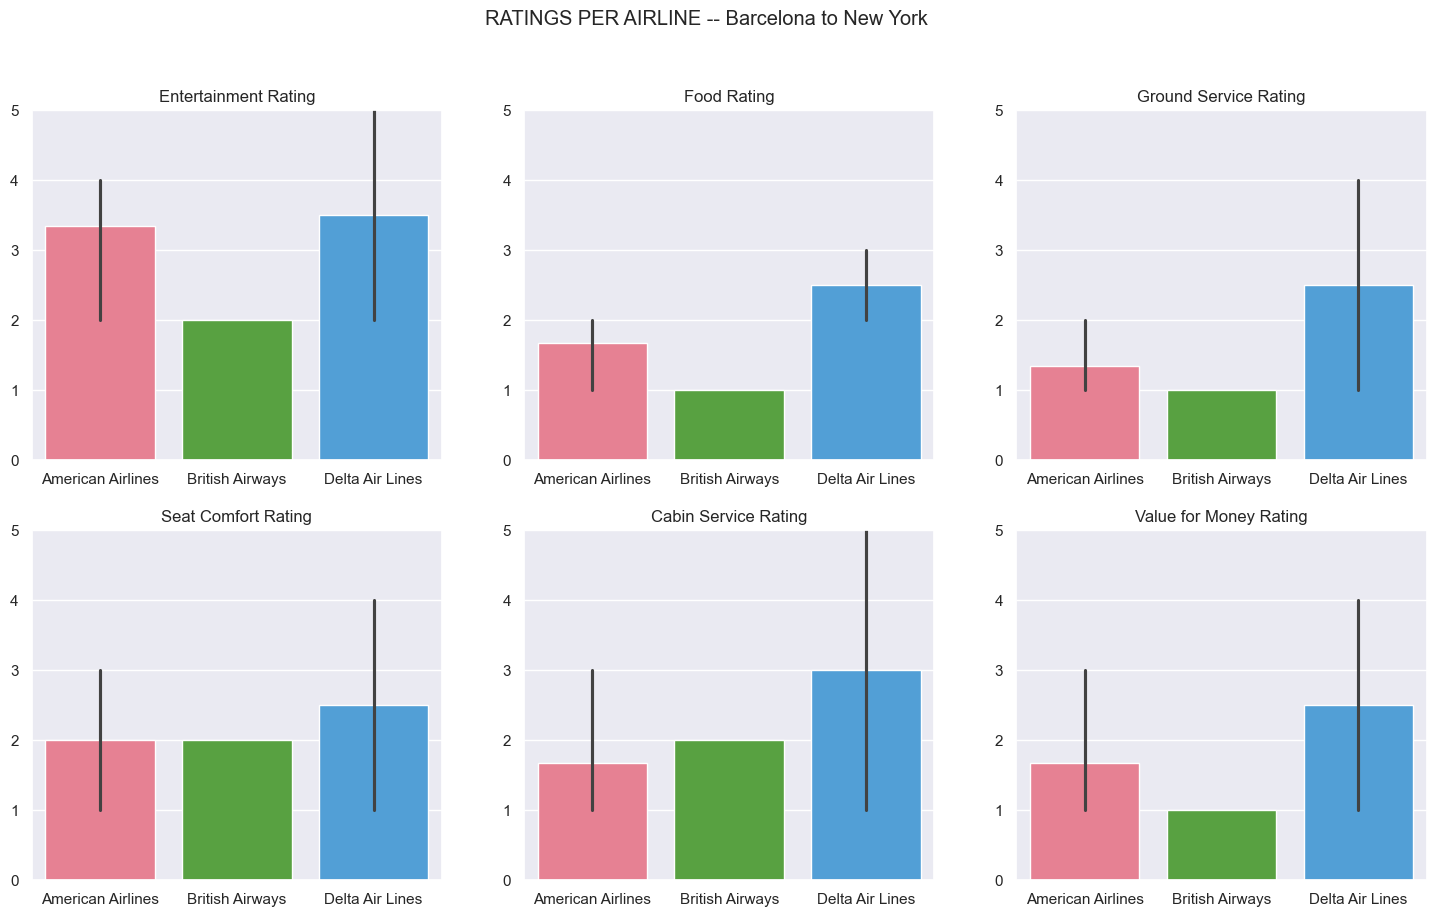

In [45]:
#plot of the effect between each rating and the overall score by airline
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
 
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
y_limit = (0, 5)
 
fig.suptitle('RATINGS PER AIRLINE -- Barcelona to New York')

 
sns.barplot(ax=axes[0, 0], data=grouped_hm, x='AIRLINENAME', y='ENTERTAINMENTRATING', palette='husl')
axes[0, 0].set_ylim(y_limit)
axes[0, 0].set_title('Entertainment Rating')
axes[0, 0].set(xlabel=None)
axes[0, 0].set(ylabel=None)

sns.barplot(ax=axes[0, 1], data=grouped_hm, x='AIRLINENAME', y='FOODRATING', palette='husl')
axes[0, 1].set_ylim(y_limit)
axes[0, 1].set_title('Food Rating')
axes[0, 1].set(xlabel=None)
axes[0, 1].set(ylabel=None)

sns.barplot(ax=axes[0, 2], data=grouped_hm, x='AIRLINENAME', y='GROUNDSERVICERATING', palette='husl')
axes[0, 2].set_ylim(y_limit)
axes[0, 2].set_title('Ground Service Rating')
axes[0, 2].set(xlabel=None)
axes[0, 2].set(ylabel=None)

sns.barplot(ax=axes[1, 0], data=grouped_hm, x='AIRLINENAME', y='SEATCOMFORTRATING', palette='husl')
axes[1, 0].set_ylim(y_limit)
axes[1, 0].set_title('Seat Comfort Rating')
axes[1, 0].set(xlabel=None)
axes[1, 0].set(ylabel=None)

sns.barplot(ax=axes[1, 1], data=grouped_hm, x='AIRLINENAME', y='SERVICERATING', palette='husl')
axes[1, 1].set_ylim(y_limit)
axes[1, 1].set_title('Cabin Service Rating')
axes[1, 1].set(xlabel=None)
axes[1, 1].set(ylabel=None)

sns.barplot(ax=axes[1, 2], data=grouped_hm, x='AIRLINENAME', y='VALUERATING', palette='husl')
axes[1, 2].set_ylim(y_limit)
axes[1, 2].set_title('Value for Money Rating')
axes[1, 2].set(xlabel=None)
axes[1, 2].set(ylabel=None)

In [46]:
df.LONGDISTANCE.value_counts()

LONGDISTANCE
1    50174
0    39834
Name: count, dtype: int64

In [47]:
df.LONGDISTANCE=np.where(df.LONGDISTANCE==1, 'Yes', 'No')

In [48]:
grouped=dfeda.groupby(["AIRLINENAME", "CABINTYPE", "TRAVELLER", "SCALE_YN", "TRIPVERIFIED","LONGDISTANCE", "YEAR"], as_index=False).mean("OVERALLSCORE")
grouped.round(2)

,AIRLINENAME,CABINTYPE,TRAVELLER,SCALE_YN,TRIPVERIFIED,LONGDISTANCE,YEAR,ENTERTAINMENTRATING,FOODRATING,GROUNDSERVICERATING,OVERALLSCORE,SEATCOMFORTRATING,SERVICERATING,VALUERATING,WIFIRATING
0,American Airlines,1,Couple,0,0,0,2015,0.0,1.00,1.52,2.61,1.96,1.87,1.61,0.17
1,American Airlines,1,Couple,0,0,0,2016,0.0,0.75,1.29,1.42,1.58,1.46,1.42,0.25
2,American Airlines,1,Couple,0,0,0,2017,0.0,0.58,1.00,1.26,1.11,1.32,1.16,0.00
3,American Airlines,1,Couple,0,0,0,2018,0.0,0.25,1.50,1.17,1.33,1.50,1.58,0.00
4,American Airlines,1,Couple,0,0,0,2019,0.0,0.33,1.28,2.28,1.61,1.72,1.50,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2223,United Airlines,4,Solo,1,1,1,2018,1.0,1.00,1.00,1.00,1.00,2.00,1.00,1.00
2224,United Airlines,4,Solo,1,1,1,2019,5.0,5.00,5.00,10.00,5.00,5.00,5.00,0.00
2225,United Airlines,4,Solo,1,1,1,2020,2.0,1.00,3.00,3.00,2.00,4.00,2.00,1.00
2226,United Airlines,4,Solo,1,1,1,2022,1.8,2.60,2.20,2.60,3.00,2.80,1.80,1.40


In [49]:
grouped.reset_index(drop=True, inplace=True)

In [50]:
grouped.YEAR.value_counts()

YEAR
2022    324
2021    283
2019    273
2018    268
2017    259
2020    218
2023    200
2016    199
2015    188
2014     16
Name: count, dtype: int64

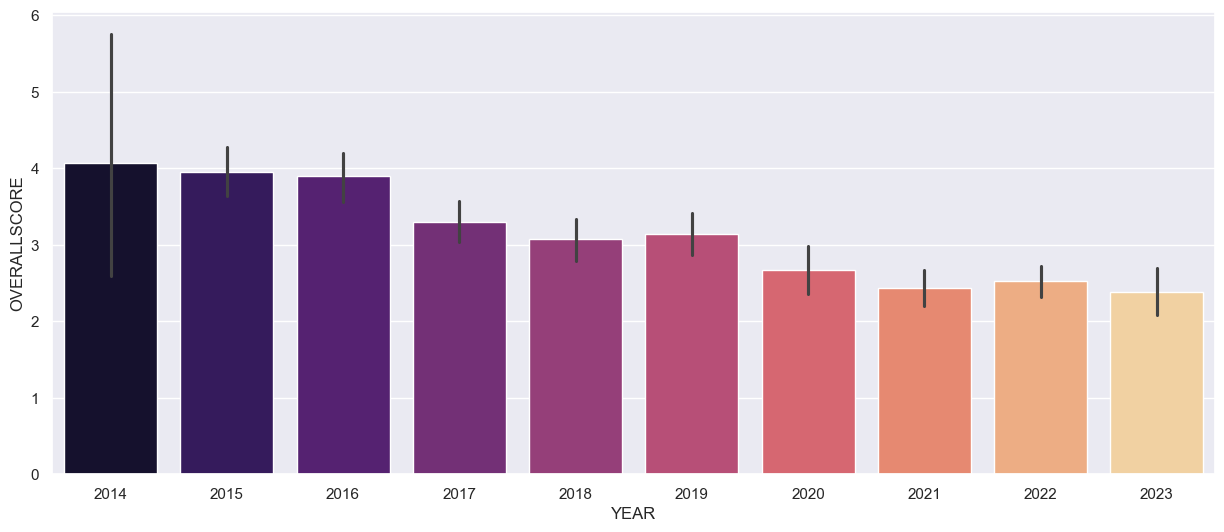

In [51]:
#plot the overallscore per year
barplot = sns.barplot(x="YEAR", y="OVERALLSCORE", data=grouped, palette="magma")


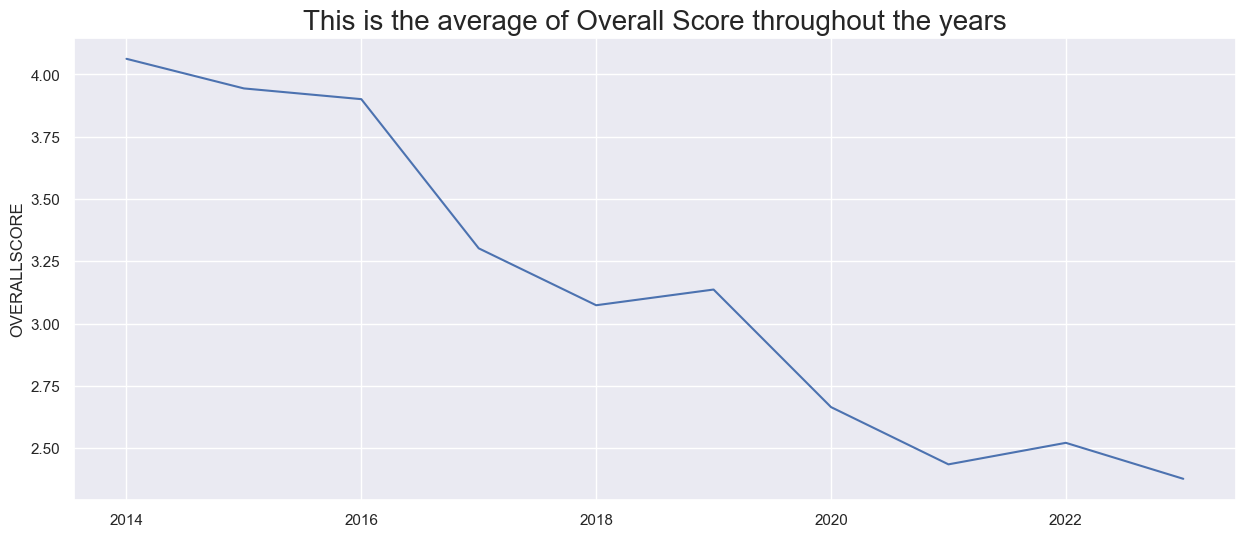

In [52]:
sns.lineplot(data=grouped, x="YEAR", y="OVERALLSCORE", ci=None); 
plt.xlabel(None);
plt.title("This is the average of Overall Score throughout the years", fontsize = 20);

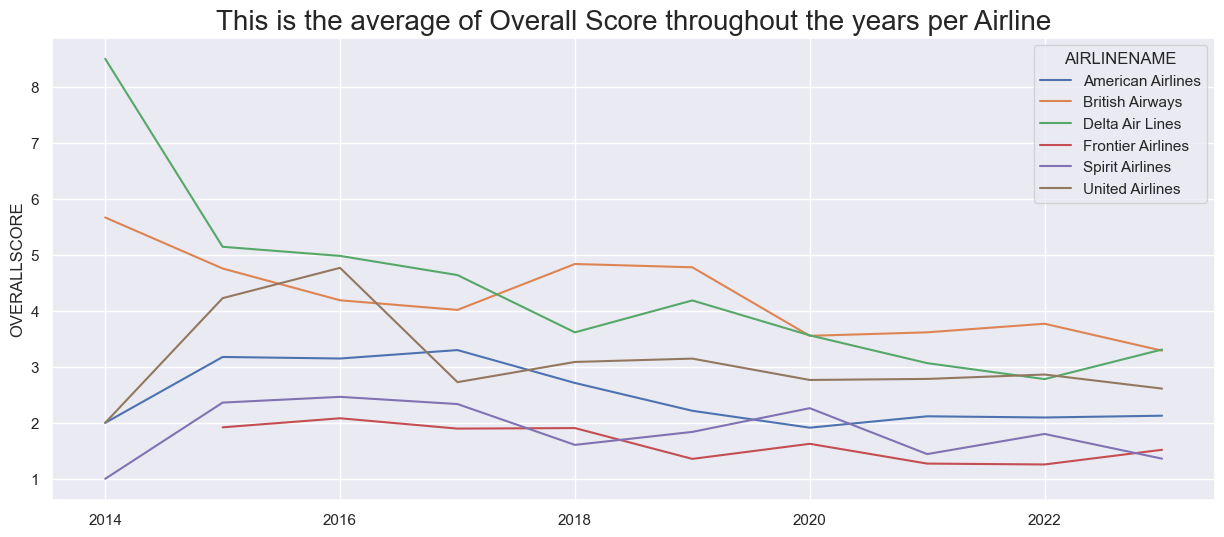

In [53]:
#lineplot of overall score per years for each airline
sns.lineplot(data=grouped, x="YEAR", y="OVERALLSCORE", hue="AIRLINENAME", errorbar=None);
plt.xlabel(None);
plt.title("This is the average of Overall Score throughout the years per Airline", fontsize = 20);

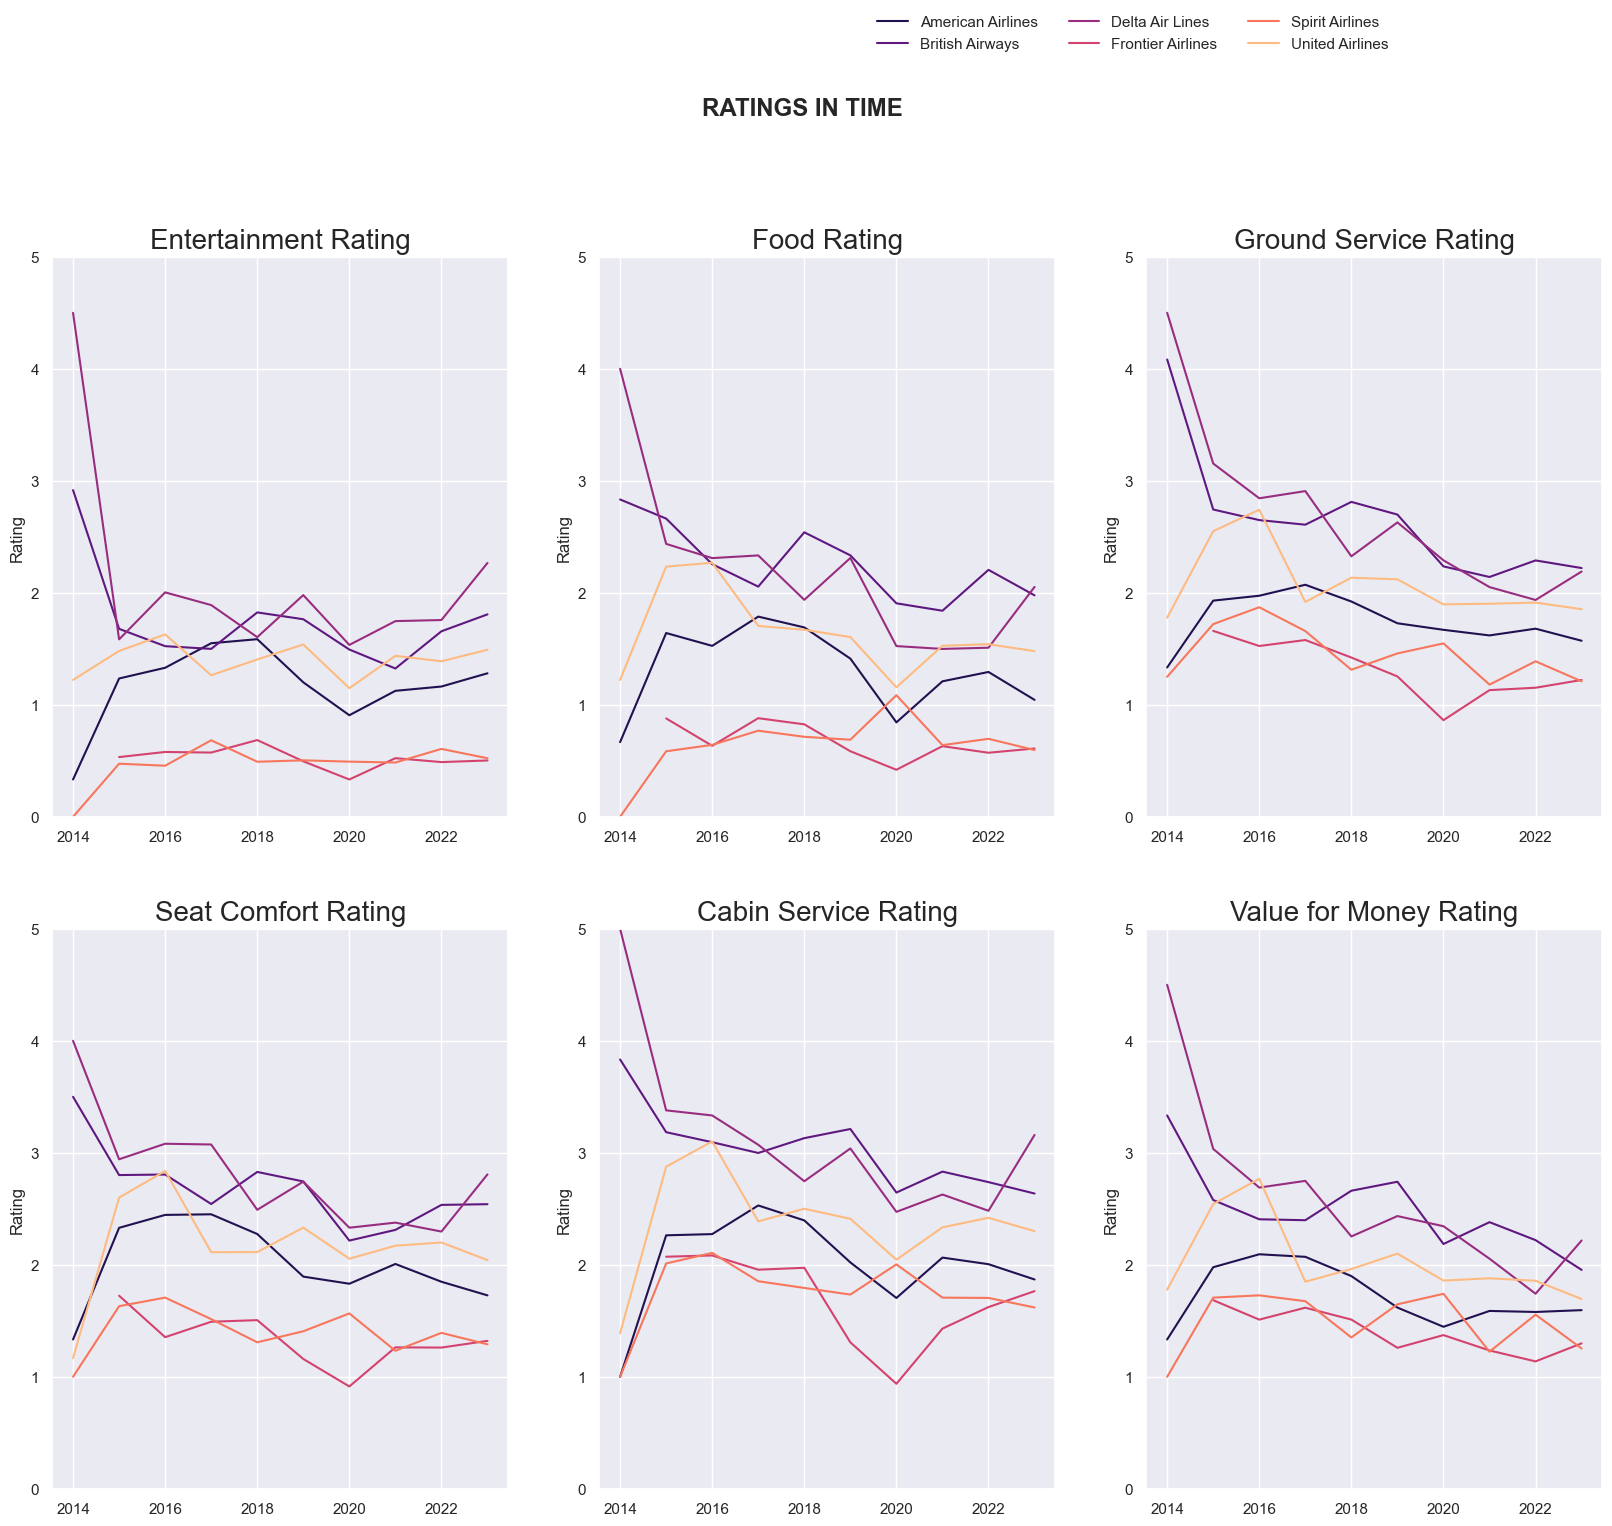

In [54]:
#for each rating
fig, axes = plt.subplots(2, 3, figsize=(20, 16))
fig.get_tight_layout
y_limit = (0, 5)
 
fig.suptitle('RATINGS IN TIME',
                            fontsize = 'x-large' , 
                            fontweight = 'bold' )
 
sns.lineplot(ax=axes[0, 0], data=grouped, x='YEAR', y='ENTERTAINMENTRATING', hue="AIRLINENAME", palette='magma', errorbar=None)
axes[0, 0].set_ylim(y_limit)
axes[0, 0].set_title('Entertainment Rating',fontsize=20)
axes[0, 0].set(xlabel=None)
axes[0, 0].set(ylabel='Rating')
axes[0, 0].get_legend().set_visible(False)


sns.lineplot(ax=axes[0, 1], data=grouped, x='YEAR', y='FOODRATING', hue="AIRLINENAME", palette='magma',errorbar=None, legend=False)
axes[0, 1].set_ylim(y_limit)
axes[0, 1].set(xlabel=None)
axes[0, 1].set(ylabel='Rating')
axes[0, 1].set_title('Food Rating',fontsize=20)


sns.lineplot(ax=axes[0, 2], data=grouped, x='YEAR', y='GROUNDSERVICERATING', hue="AIRLINENAME", palette='magma',errorbar=None, legend=False)
axes[0, 2].set_ylim(y_limit)
axes[0, 2].set(xlabel=None)
axes[0, 2].set(ylabel='Rating')
axes[0, 2].set_title('Ground Service Rating',fontsize=20)


sns.lineplot(ax=axes[1, 0], data=grouped, x='YEAR', y='SEATCOMFORTRATING', hue="AIRLINENAME", palette='magma', errorbar=None, legend=False)
axes[1, 0].set_ylim(y_limit)
axes[1, 0].set(xlabel=None)
axes[1, 0].set(ylabel='Rating')
axes[1, 0].set_title('Seat Comfort Rating',fontsize=20)


sns.lineplot(ax=axes[1, 1], data=grouped, x='YEAR', y='SERVICERATING', hue="AIRLINENAME", palette='magma', errorbar=None, legend=False)
axes[1, 1].set_ylim(y_limit)
axes[1, 1].set(xlabel=None)
axes[1, 1].set(ylabel='Rating')
axes[1, 1].set_title('Cabin Service Rating',fontsize=20)


sns.lineplot(ax=axes[1, 2], data=grouped, x='YEAR', y='VALUERATING', hue="AIRLINENAME", palette='magma', errorbar=None, legend=False)
axes[1, 2].set_ylim(y_limit)
axes[1, 2].set(xlabel=None)
axes[1, 2].set(ylabel='Rating')
axes[1, 2].set_title('Value for Money Rating',fontsize=20)

# Legend for the whole chart
handles, labels = axes[0, 0].get_legend_handles_labels()
axes[0,0].set(xlabel=None)
axes[0,0].set(ylabel='Rating')
fig.legend(handles, labels, loc='lower right', ncol=3, bbox_to_anchor=(0.8, 1), frameon=False)



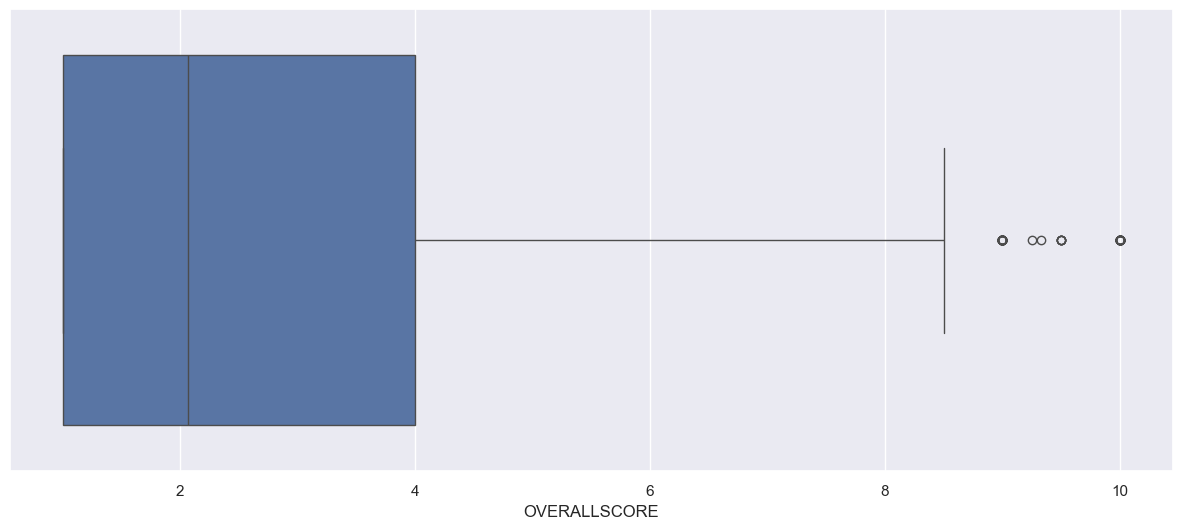

In [55]:
#overallscore mean is mainly poor...
sns.boxplot(x=grouped.OVERALLSCORE)
plt.show()

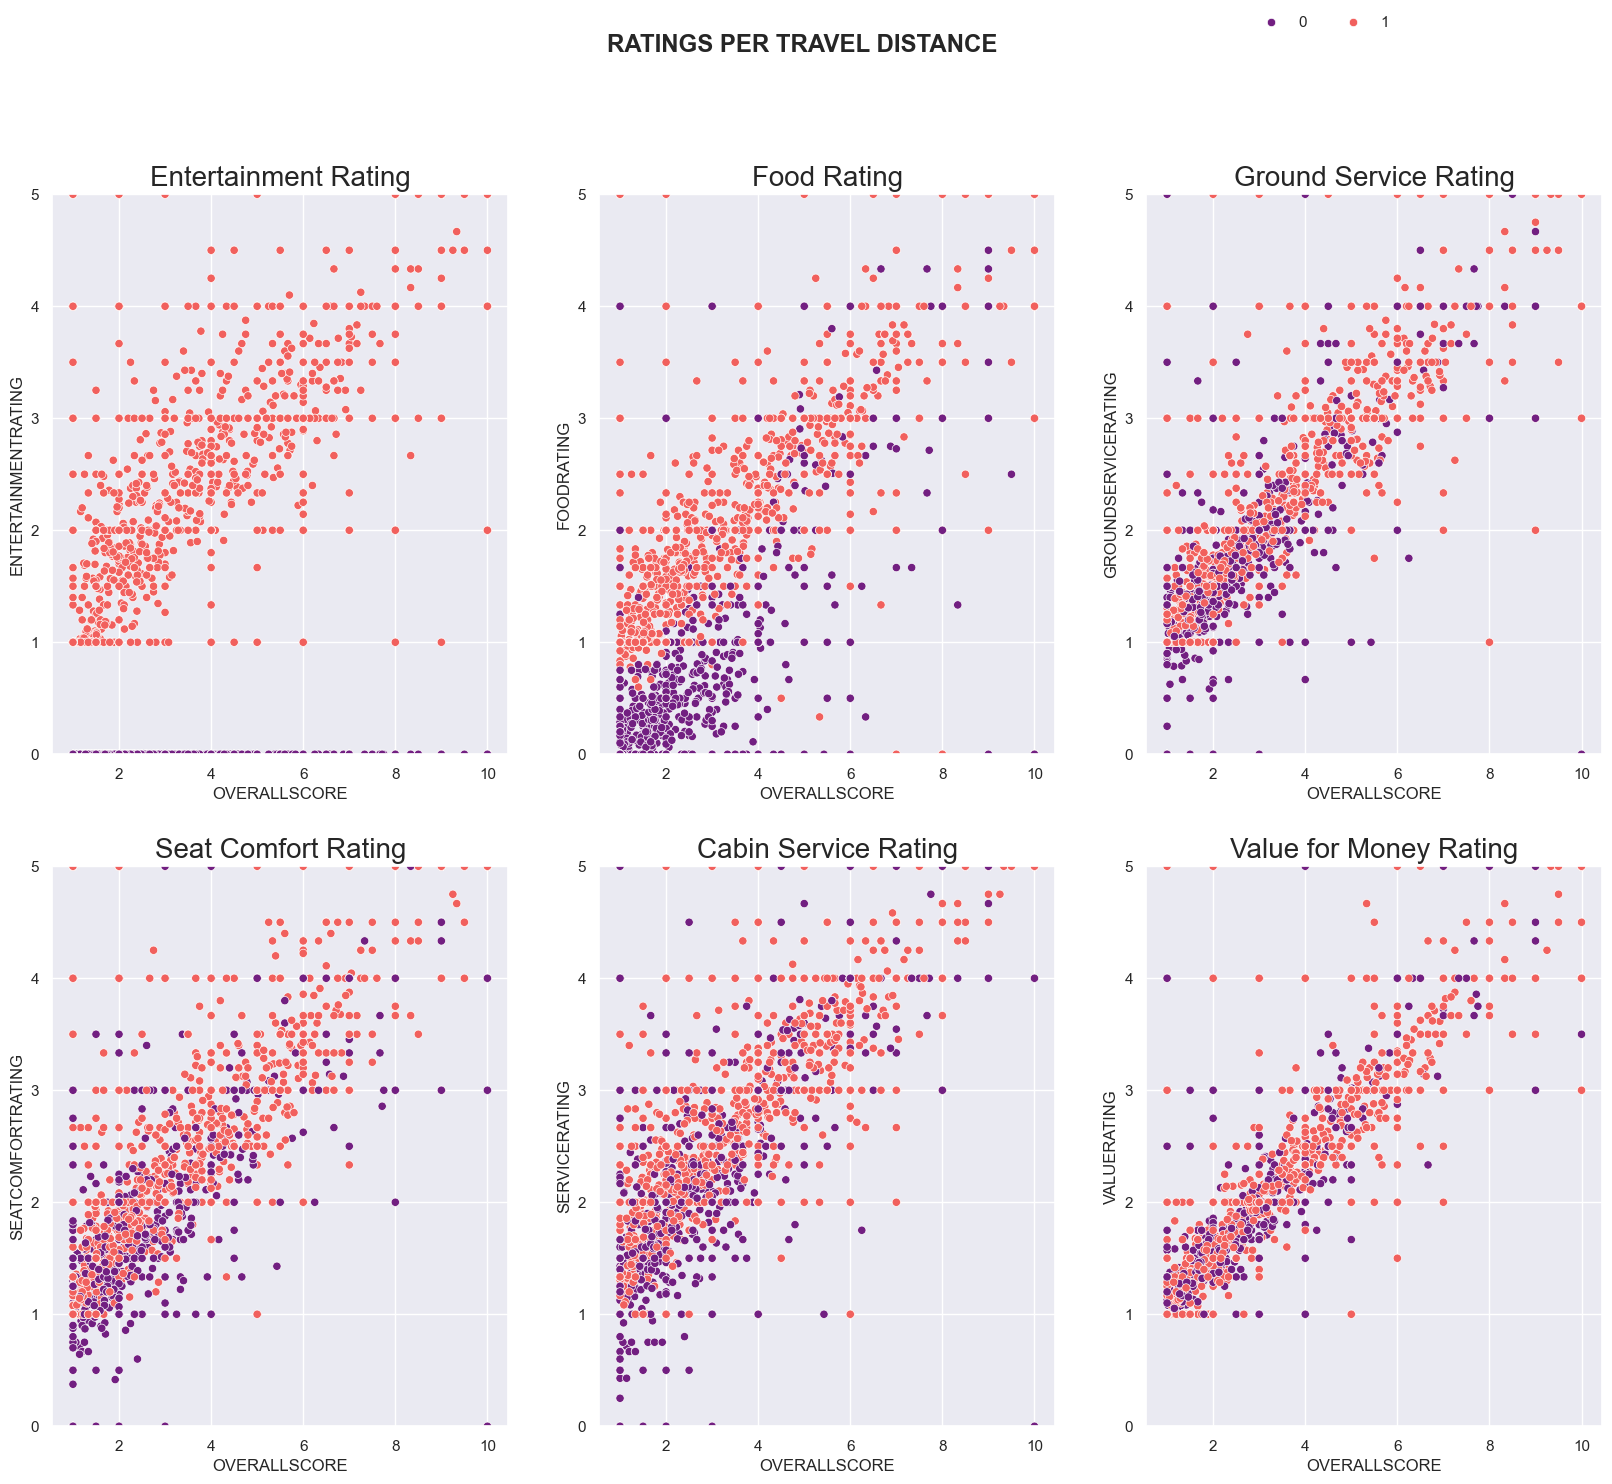

In [56]:
#Scatterpolots
#plots of the effect between each rating and the overall score by airline
 
fig, axes = plt.subplots(2, 3, figsize=(20, 16))
fig.get_tight_layout
y_limit = (0, 5)
 
fig.suptitle('RATINGS PER TRAVEL DISTANCE',
                            fontsize = 'x-large' , 
                            fontweight = 'bold' )
 
sns.scatterplot(ax=axes[0, 0], data=grouped, x='OVERALLSCORE', y='ENTERTAINMENTRATING', hue="LONGDISTANCE", palette='magma')
axes[0, 0].set_ylim(y_limit)
axes[0, 0].set_title('Entertainment Rating',fontsize=20)
axes[0, 0].get_legend().set_visible(False)


sns.scatterplot(ax=axes[0, 1], data=grouped, x='OVERALLSCORE', y='FOODRATING', hue="LONGDISTANCE", palette='magma', legend=False)
axes[0, 1].set_ylim(y_limit)
axes[0, 1].set_title('Food Rating',fontsize=20)


sns.scatterplot(ax=axes[0, 2], data=grouped, x='OVERALLSCORE', y='GROUNDSERVICERATING', hue="LONGDISTANCE", palette='magma', legend=False)
axes[0, 2].set_ylim(y_limit)
axes[0, 2].set_title('Ground Service Rating',fontsize=20)


sns.scatterplot(ax=axes[1, 0], data=grouped, x='OVERALLSCORE', y='SEATCOMFORTRATING', hue="LONGDISTANCE", palette='magma', legend=False)
axes[1, 0].set_ylim(y_limit)
axes[1, 0].set_title('Seat Comfort Rating',fontsize=20)


sns.scatterplot(ax=axes[1, 1], data=grouped, x='OVERALLSCORE', y='SERVICERATING', hue="LONGDISTANCE", palette='magma', legend=False)
axes[1, 1].set_ylim(y_limit)
axes[1, 1].set_title('Cabin Service Rating',fontsize=20)


sns.scatterplot(ax=axes[1, 2], data=grouped, x='OVERALLSCORE', y='VALUERATING', hue="LONGDISTANCE", palette='magma', legend=False)
axes[1, 2].set_ylim(y_limit)
axes[1, 2].set_title('Value for Money Rating',fontsize=20)

# Legend for the whole chart
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', ncol=3, bbox_to_anchor=(0.8, 1), frameon=False)
